# Engineering optical forces through Maxwell Stress Tensor inverse design: topology Optimization of a particle

This notebook explains how to optimize the geometry of a particle to maximize the upwards force under plane-wave illumination. 

In [1]:
import sys
import os 

relative_path = "./../src/"
absolute_path = os.path.abspath(relative_path)

if absolute_path not in sys.path:
    sys.path.append(absolute_path)

In [2]:
import numpy as np
from solver import freq_top_opt_2D

### Geometric parameters:

We start with some general geometric variables for the mesh:

In [3]:
r = 0.5 # mesh refinement factor: the larger the refinement factor, the finer the mesh.
scaling =  20e-9/r # the scale applied to the physical problem, all geometric values are given in units of this scaling.
fR = int(6*r) # value for the filtering radius   
nElx = int(r*200) + 2*fR # the number of elements in the X axis
nEly = int(r*100) + 2*fR # the number of elements in the Y axis\

Now we set the variables for the design region for the lens. Since we will just optimize the particle in this example, we set the initial guess to zero.

In [4]:
thickness = int(r*10) # the thickness of the design region for the lens, in number of elements in the Y direction
limit = int(np.floor((nEly-2*fR)*9/10))+fR # the lower limit of the design region, 0.9 * total height of the simulation volume
dVElmIdx = np.array([np.arange(limit-thickness,limit),np.arange(fR,nElx-fR)])  # the indexes of the domain of the  design variables
DVini = 0.0 * np.ones(len(dVElmIdx[0])*len(dVElmIdx[1])) # the initial value / guess for the design parameters

/tmp/ipykernel_418481/1213506299.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dVElmIdx = np.array([np.arange(limit-thickness,limit),np.arange(fR,nElx-fR)])  # the indexes of the domain of the  design variables


Now we do the same for the geometric variables for the particle:

In [5]:
center = [int(r*100)+ fR, int(r*40)+ fR] # the index for the geometric center of the particle
width_part = int(r*35) # the width of the particle
height_part = int(r*35) # the height of the particle
dVElmIdx_part = np.array([np.arange(center[1]-height_part//2,center[1]+height_part//2),np.arange(center[0]-width_part//2,center[0]+width_part//2)])  # the indexes of the domain of the  design variables
dVElmIdx_part_pad = np.array([np.arange(center[1]-height_part//2-fR,center[1]+height_part//2+fR),np.arange(center[0]-width_part//2-fR,center[0]+width_part//2+fR)])  # a padded (pad: fR) version of the indexes of the domain of the  design variables
DVini_part = 1 * np.ones(len(dVElmIdx_part[0])*len(dVElmIdx_part[1])) # the initial value / guess for the design parameters
part_shape = "design" # shape of the particle, can be chosen to be a square or a cirlce too.
part_size = int(r*35) # the size of the particle, only necessary for square or circle particles.

### Material parameters:

In [6]:
eps = 4      # value of the dielectric function for the metalens
eps_part = 4 # value of the dielectric function of the particle

### Physical parameters:

In [7]:
wl = int(r*35)  # value for the wavelentgth, i.e. 35*20nm=700 nm.

### Optimization parameters:

In [8]:
eta = 0.5
beta = 5

### Initializing solver:

In [9]:
solver = freq_top_opt_2D( center,
                          dVElmIdx,
                          dVElmIdx_part,
                          dVElmIdx_part_pad,
                          nElx, 
                          nEly,
                          DVini,
                          DVini_part,  
                          eps, 
                          wl,  
                          fR,
                          eta, 
                          beta,
                          scaling,
                          part_shape,
                          part_size,
                          eps_part
                        )

### Solving the forward problem for initial design:

FOM:  (20238077029853.246+0j)
Elapsed time in iteration: 0 min 1 s
----------------------------------------------


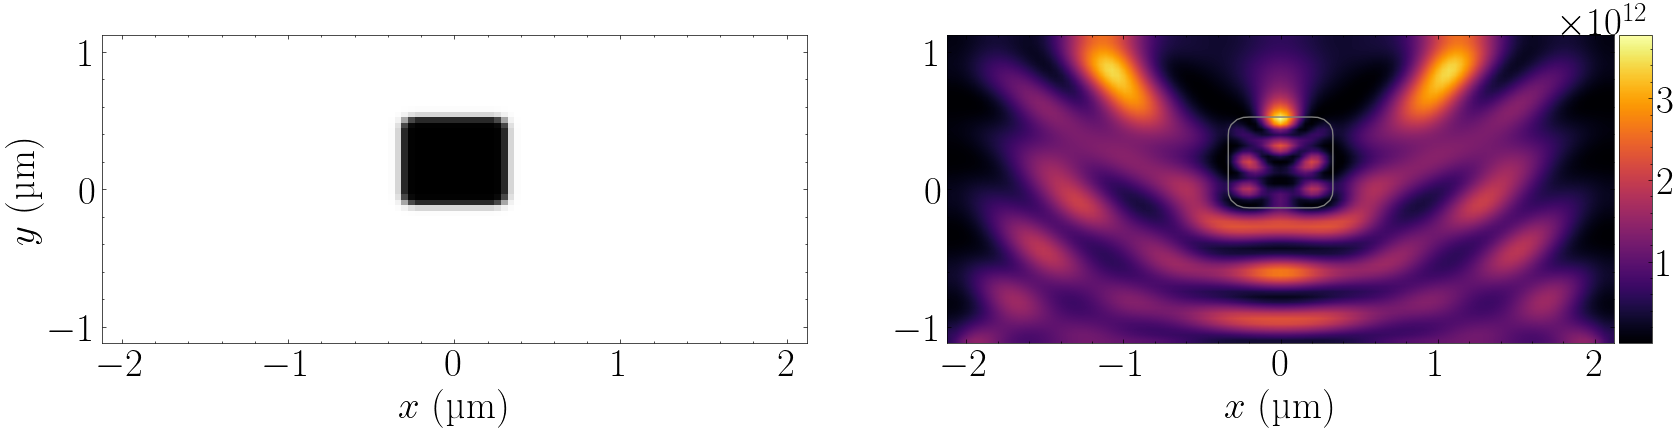

In [10]:
Ez, FOM = solver.solve_forward(DVini, DVini_part)

7214.649457878154


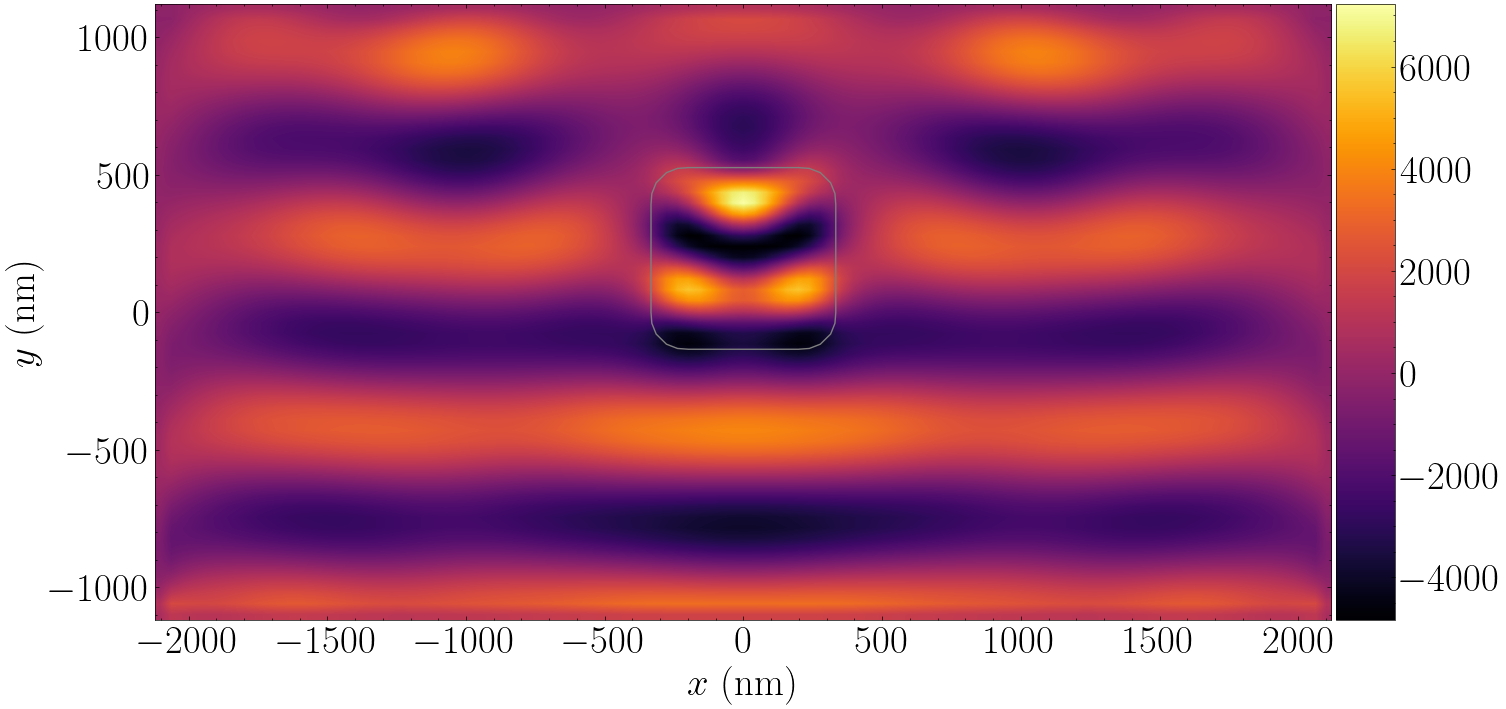

In [11]:
solver.plot_H_field(comp="x")

3534.315517939217


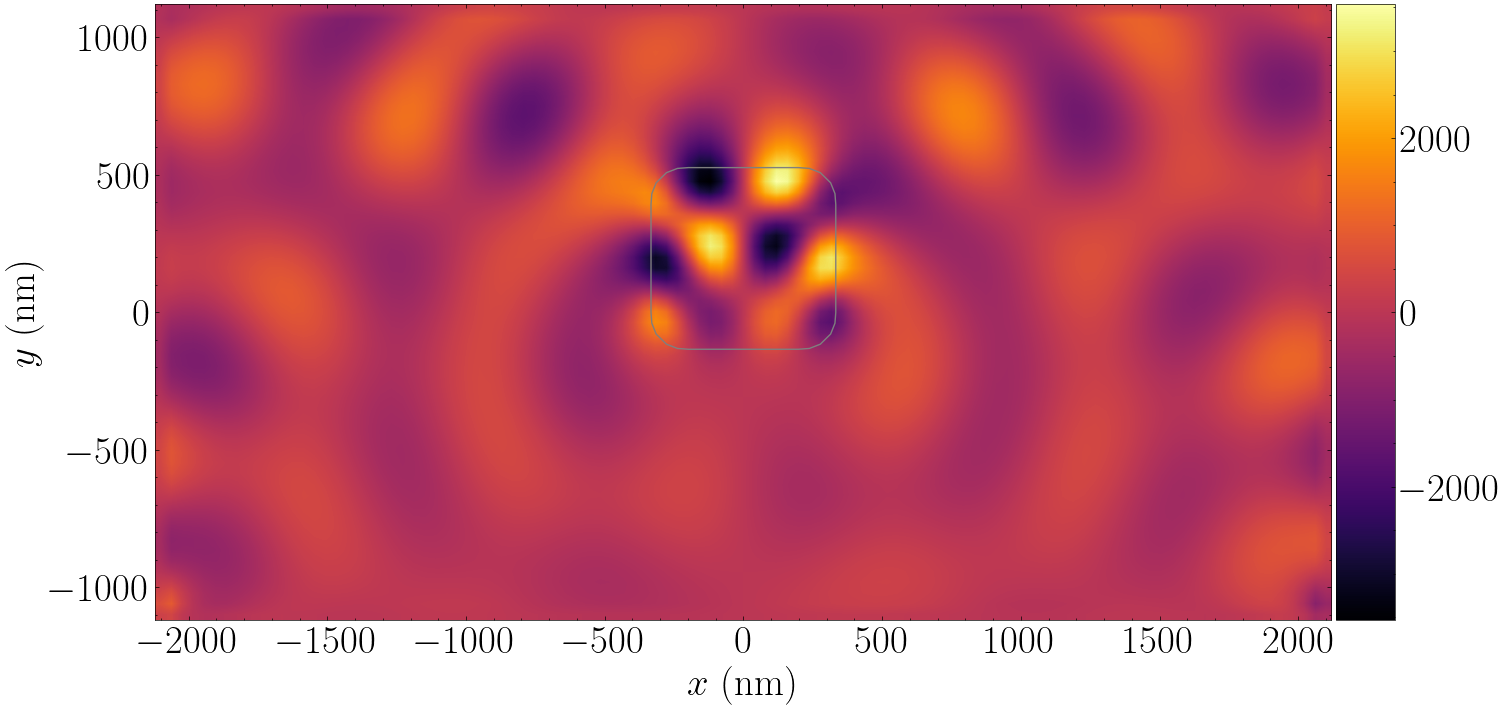

In [12]:
solver.plot_H_field(comp="y")

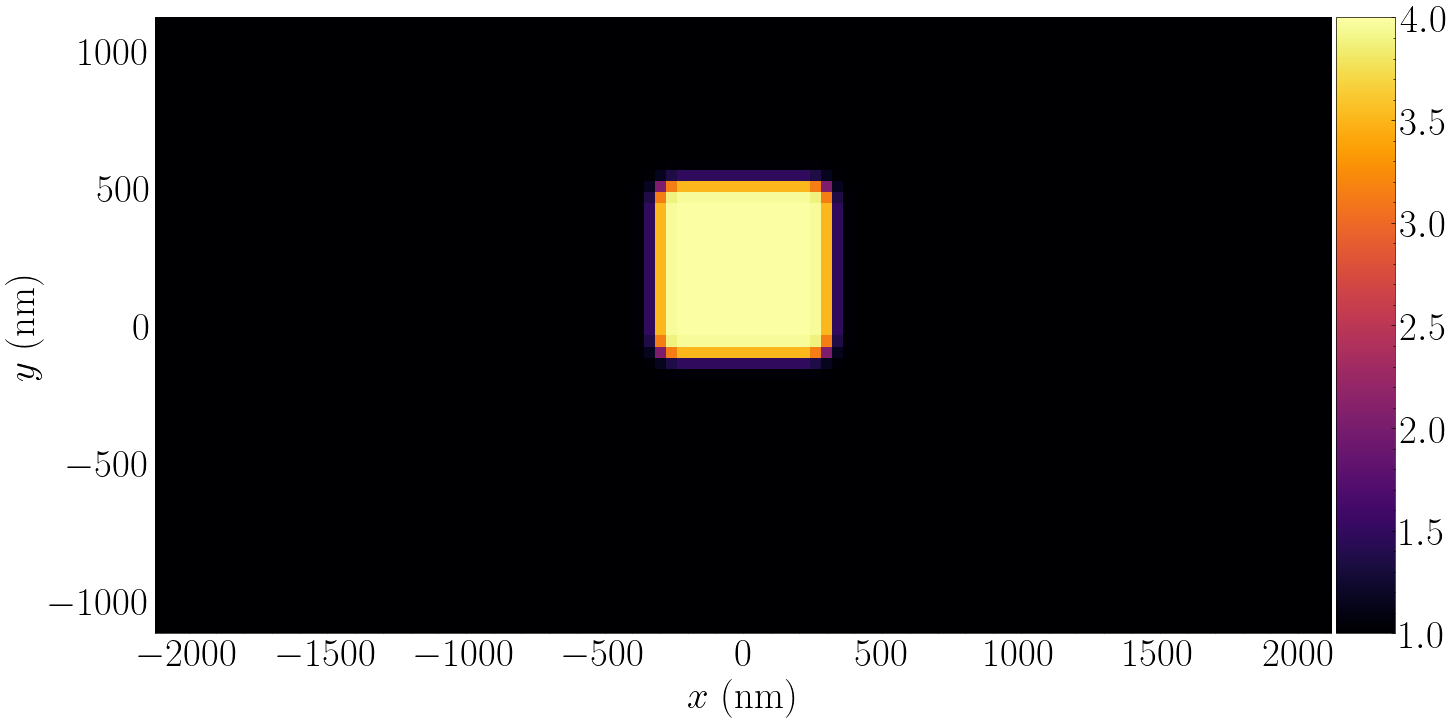

In [13]:
solver.plot_material_interpolation()

In [14]:
#raise()

In [15]:
solver.calculate_forces()
raise()

Fx:  (-2.0650148258027913e-21+0j)
Fy:  (3.035711554477987e-06+0j)


TypeError: exceptions must derive from BaseException

We call the solver to solve the Topology Optimization problem.

In [ ]:
dVs_tot = solver.optimize(maxItr, alg)

In [ ]:
print(solver.beta)

In [ ]:
print(solver.alpha)

In [ ]:
dVs = solver.dVs
dVs_part = solver.dVs_part

In [ ]:
raise()

In [ ]:
dVs_tot = np.concatenate([dVs.flatten(), dVs_part.flatten()])
np.save("designs/new_test.npy",dVs_tot)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,10))
ax.plot(solver.opt.FOM_it, label="cost-function")
ax.plot(solver.opt.cons_1_it, label="Lens connectivity")
ax.plot(solver.opt.cons_2_it, label="Particle connectivity")
print(solver.opt.cons_2_it)
ax.legend()
fig

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))
i = 0
for lam in solver.opt.lam_array:
    print(i)
    ax.plot(lam, label=str(i))
    i+=1
ax.legend()
fig

In [ ]:
solver.calculate_forces()

In [ ]:
Ez, FOM = solver.solve_forward(dVs, dVs_part)